# EDA for the second challenge 

In [7]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns


df = pd.read_csv('BusRoutes.txt', sep='|')
print("Number of Routes >> " + str(df.shape[0]))

Number of Routes >> 48312


# Bus routes

In [8]:
df.columns

Index(['IDRoute', 'linkid'], dtype='object')

In [9]:
df.head(10)

,IDRoute,linkid
0,1,537277300
1,1,537277673
2,1,537277754
3,1,537277777
4,1,537277795
5,1,537277954
6,1,537277980
7,1,537278408
8,1,537278623
9,1,537278860


## Unique Routes and Links

In [10]:
df.nunique(axis=0)

IDRoute      166
linkid     19277
dtype: int64

## Links per Bus Route (e.g, road)

In [11]:
df.groupby('IDRoute', as_index=False)['linkid'].count() \
                                               .rename(columns={'linkid':'Number of Links'}) \
                                               .sort_values("Number of Links", ascending=False) 

,IDRoute,Number of Links
52,53,613
7,8,608
135,136,585
127,128,572
62,63,565
...,...,...
96,97,41
22,23,6
20,21,5
21,22,2


## Bus Routes per Link  

In [12]:
dfLinkRoutesCount = df.groupby('linkid', as_index=False)['IDRoute'].count() \
                                               .rename(columns={'IDRoute':'RoutesNumber'}) \
                                               .sort_values("RoutesNumber", ascending=False) 


dfLinkRoutesCount

,linkid,RoutesNumber
6679,724627591,20
15464,1172432839,20
6678,724627590,20
9401,836110932,20
6676,724627588,20
...,...,...
8991,812148656,1
8993,812148837,1
8995,812149330,1
9000,812234969,1


## Most links are used by few routes 

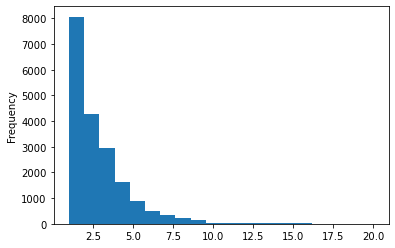

In [63]:
dfLinkRoutesCount.RoutesNumber.plot.hist(bins=20);

## Possible "stroke" points (Links with too many routes going through them)

In [3]:
dfSenior = pd.read_csv('Senior_TIM_v1.txt', sep='|', encoding= 'unicode_escape')
print("Number of Routes >> " + str(dfSenior.shape[0]))

Number of Routes >> 121053


In [5]:
dfSenior.columns


Index(['linkid', 'Region_of_Origin', 'District_of_Origin', 'County_of_Origin',
       'Average_Daily_SeniorPopulation_Travelling'],
      dtype='object')

In [4]:
dfSenior.head()

,linkid,Region_of_Origin,District_of_Origin,County_of_Origin,Average_Daily_SeniorPopulation_Travelling
0,80216810,R1 - AM Lisboa,Lisboa,Lisboa,2013.681187
1,80216810,R1 - AM Lisboa,Setúbal,Palmela,7688.296396
2,80216810,R1 - AM Lisboa,Lisboa,Oeiras,220.647248
3,80216810,R1 - AM Lisboa,Lisboa,Vila Franca de Xira,233.203075
4,80216812,R1 - AM Lisboa,Lisboa,Lisboa,261.606014


In [28]:
joinedDf=dfSenior.merge(df)
joinedDf.head()

,linkid,Region_of_Origin,District_of_Origin,County_of_Origin,Average_Daily_SeniorPopulation_Travelling,IDRoute
0,80216810,R1 - AM Lisboa,Lisboa,Lisboa,2013.681187,8
1,80216810,R1 - AM Lisboa,Lisboa,Lisboa,2013.681187,85
2,80216810,R1 - AM Lisboa,Setúbal,Palmela,7688.296396,8
3,80216810,R1 - AM Lisboa,Setúbal,Palmela,7688.296396,85
4,80216810,R1 - AM Lisboa,Lisboa,Oeiras,220.647248,8


# Links/Routes per Region, District and County

In [48]:
joinedDf.groupby("Region_of_Origin").agg({'linkid': 'nunique', 'IDRoute': 'nunique', 'Average_Daily_SeniorPopulation_Travelling': 'mean'}) \
                                   .rename(columns={'linkid':'NumberOfLinks', 'IDRoute':'NumberOfRoutes', 'Average_Daily_SeniorPopulation_Travelling': 'AvgDailyPopulation'}) \
                                   .sort_values("NumberOfLinks", ascending=False) 

,NumberOfLinks,NumberOfRoutes,AvgDailyPopulation
Region_of_Origin,,,
R1 - AM Lisboa,6184,160,576.977871
R2 - AM Porto,3803,133,2435.724436


In [50]:
joinedDf.groupby("District_of_Origin").agg({'linkid': 'nunique', 'IDRoute': 'nunique', 'Average_Daily_SeniorPopulation_Travelling': 'mean'}) \
                                   .rename(columns={'linkid':'NumberOfLinks', 'IDRoute':'NumberOfRoutes', 'Average_Daily_SeniorPopulation_Travelling': 'AvgDailyPopulation'}) \
                                   .sort_values("NumberOfLinks", ascending=False) 

,NumberOfLinks,NumberOfRoutes,AvgDailyPopulation
District_of_Origin,,,
Lisboa,5916,158,628.158972
Porto,3777,133,2451.672828
Setúbal,2368,141,365.034285
Aveiro,32,16,272.407024


In [63]:
linksRoutesPerOrigin=joinedDf.groupby(["District_of_Origin", "County_of_Origin"]).agg({'linkid': 'nunique', 'IDRoute': 'nunique', 'Average_Daily_SeniorPopulation_Travelling': 'mean'}) \
                                   .rename(columns={'linkid':'NumberOfLinks', 'IDRoute':'NumberOfRoutes', 'Average_Daily_SeniorPopulation_Travelling': 'AvgDailyPopulation'}) \
                                   .sort_values(["District_of_Origin", "AvgDailyPopulation"], ascending=[True,  False]) 

b

NumberOfLinks  NumberOfRoutes  \
District_of_Origin County_of_Origin                                      
Aveiro             Santa Maria da Feira             32              16   
Lisboa             Lisboa                         3832             132   
                   Odivelas                       1255             120   
                   Oeiras                         2824             152   
                   Vila Franca de Xira            1929             100   
                   Sintra                         1226             107   
                   Cascais                         472              98   
                   Amadora                         613              92   
                   Mafra                           283              81   
                   Loures                          141              51   
Porto              Maia                           2670              99   
                   Porto                          1478             110   
                   Gondomar                       1076              95   
                   Matosinhos                      195              33   
Setúbal            Palmela                         240              68   
                   Alcochete                         6               8   
                   Montijo                          55              15   
                   Barreiro                       1285             119   
                   Seixal                          942             110   
                   Setúbal                         113              29   
                   Sesimbra                         49              24   
                   Almada                          131              44   

                                         AvgDailyPopulation  
District_of_Origin County_of_Origin                          
Aveiro             Santa Maria da Feira          272.407024  
Lisboa             Lisboa                       1176.641628  
                   Odivelas                      715.200512  
                   Oeiras                        394.144009  
                   Vila Franca de Xira           364.993711  
                   Sintra                        351.236967  
                   Cascais                       285.334270  
                   Amadora                       155.706508  
                   Mafra                         144.367737  
                   Loures                        141.271239  
Porto              Maia                         3400.213919  
                   Porto                        2213.490123  
                   Gondomar                     1084.179459  
                   Matosinhos                    823.843490  
Setúbal            Palmela                       889.849297  
                   Alcochete                     544.140508  
                   Montijo                       441.206994  
                   Barreiro                      346.062201  
                   Seixal                        329.882526  
                   Setúbal                       138.546544  
                   Sesimbra                      116.808277  
                   Almada                         40.539317

## Distribution of links

<AxesSubplot:>

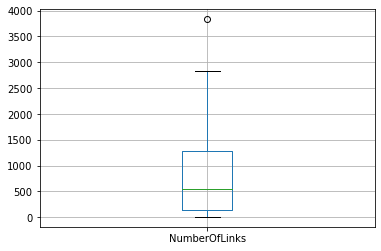

In [92]:
linksRoutesPerOrigin.boxplot('NumberOfLinks')

<AxesSubplot:ylabel='Frequency'>

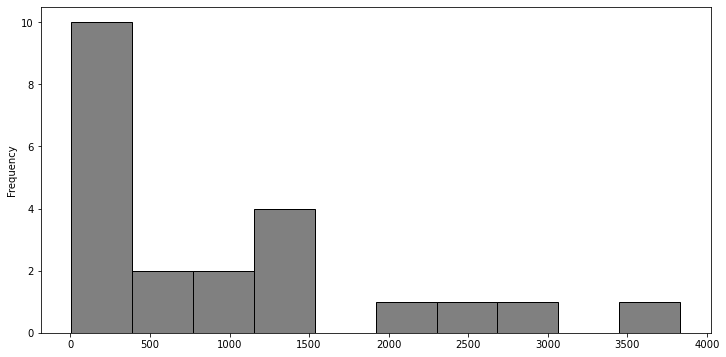

In [99]:
linksRoutesPerOrigin['NumberOfLinks'].plot(kind='hist', bins=10, figsize=(12,6), facecolor='grey',edgecolor='black')

## Distribution of routes

<AxesSubplot:>

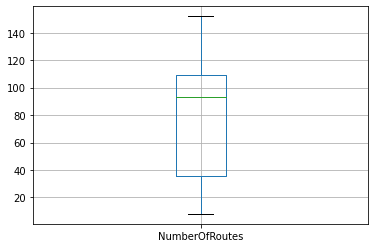

In [94]:
linksRoutesPerOrigin.boxplot('NumberOfRoutes')

<AxesSubplot:ylabel='Frequency'>

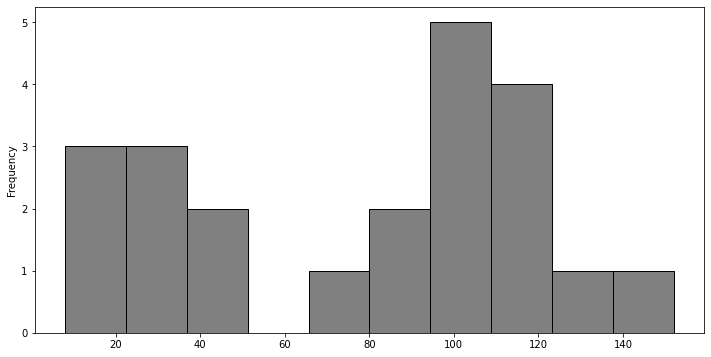

In [100]:
linksRoutesPerOrigin['NumberOfRoutes'].plot(kind='hist', bins=10, figsize=(12,6), facecolor='grey',edgecolor='black')

## Distribution of Average Daily Senior Population

<AxesSubplot:>

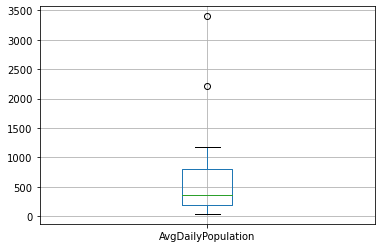

In [95]:
linksRoutesPerOrigin.boxplot('AvgDailyPopulation')

<AxesSubplot:ylabel='Frequency'>

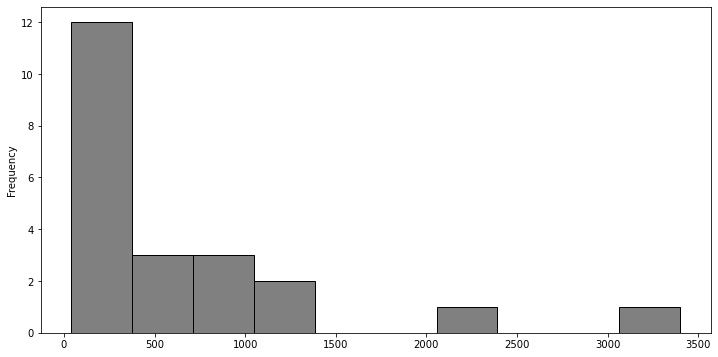

In [101]:
linksRoutesPerOrigin['AvgDailyPopulation'].plot(kind='hist', bins=10, figsize=(12,6), facecolor='grey',edgecolor='black')

## Correlation Matrix (Globally)

<AxesSubplot:>

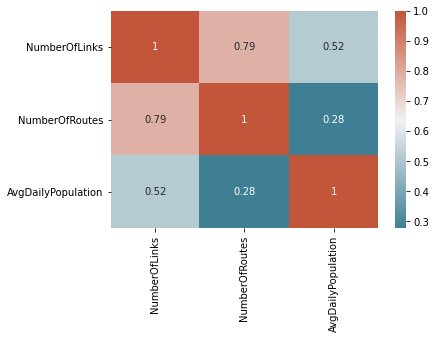

In [64]:
# calculate correlation matrix
corr = linksRoutesPerOrigin.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

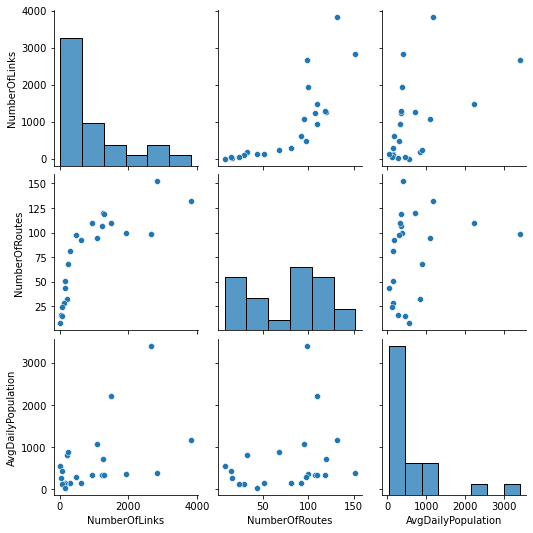

In [89]:
sns.pairplot(linksRoutesPerOrigin)

## Correlation Matrix (Porto)

<AxesSubplot:>

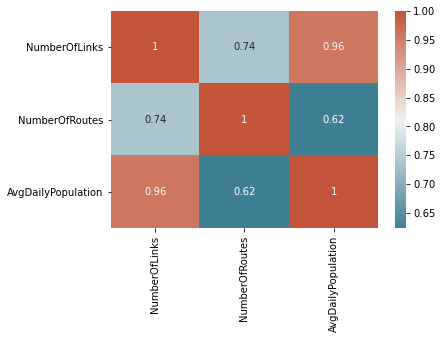

In [83]:
# calculate correlation matrix
corr = linksRoutesPerOrigin.filter(like = 'Porto', axis=0).corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

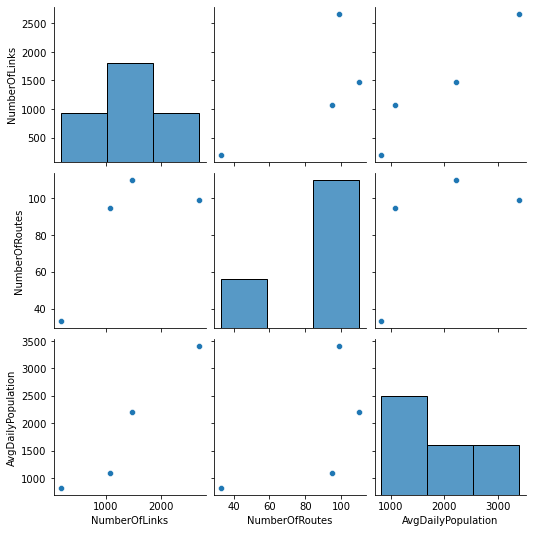

In [90]:
sns.pairplot(linksRoutesPerOrigin.filter(like = 'Porto', axis=0))

## Correlation Matrix (Lisbon)

<AxesSubplot:>

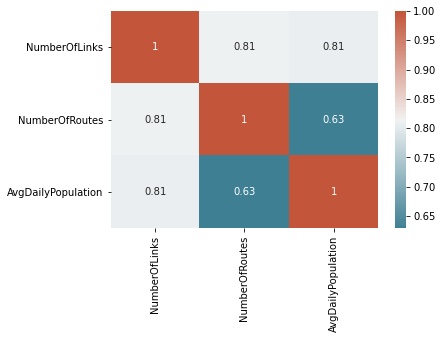

In [85]:
# calculate correlation matrix
corr = linksRoutesPerOrigin.filter(like = 'Lisboa', axis=0).corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

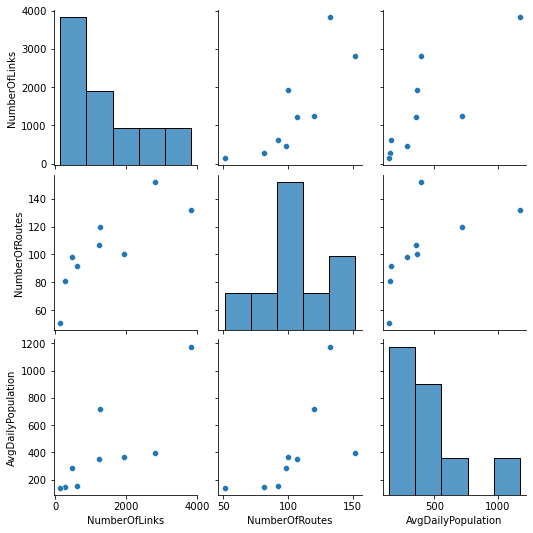

In [91]:
sns.pairplot(linksRoutesPerOrigin.filter(like = 'Lisboa', axis=0))

Some key takeways:
- Obviously more theres a positive correlation between the number of routes available and the number of links.
- Perhaps more interesting is that there's an overall positive correlation between the number of links and the average daily population of senior citizens that use public transports.
- Theres also a positive correlation between the number of routes available and the average daily population of senior citizens that use public transports. However, that correlation is not as big as the one related to links.

Based on this takeways we can possibly create a model that predicts daily population based on the number of links and routes available in a specific region.